### Import Required Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Reading and Understanding Data

In [50]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Selecting Training Data

In [51]:
x = df.iloc[::,3::].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [52]:
# Import k means algorithm
from sklearn.cluster import KMeans

In [53]:
# instance the model
km = KMeans(n_clusters=3,init='k-means++',n_init=100,max_iter=300,random_state=1)

# fit the model
km.fit(x)

KMeans(n_clusters=3, n_init=100, random_state=1)

In [54]:
# interita
km.inertia_

106348.37306211122

In [55]:
# centroids
km.cluster_centers_

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

### Elbow Method

In [56]:
wcss = []
for k in range(1,31):
    # instance the model
    km = KMeans(n_clusters=k,init='k-means++',n_init=100,max_iter=300,random_state=1)
    
    # fit the model
    km.fit(x)

    # storing model intria value into wcss variable
    wcss.append(km.inertia_)

In [57]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30227.606513152008,
 24986.52564064288,
 21797.08494464637,
 19636.753964898147,
 17511.7418692661,
 15810.343426539726,
 14263.527720370443,
 12785.29525917026,
 11630.993181818183,
 10794.163883580186,
 9903.609931160798,
 9117.53895357516,
 8512.980402054085,
 7947.485470918831,
 7510.570733706476,
 7134.7989980891525,
 6773.929362794068,
 6293.585642135642,
 5948.216831236396,
 5712.362196981762,
 5286.856837606838,
 4995.060328684904,
 4905.854292929293,
 4643.412626262627]

### Plotting Elbow Method

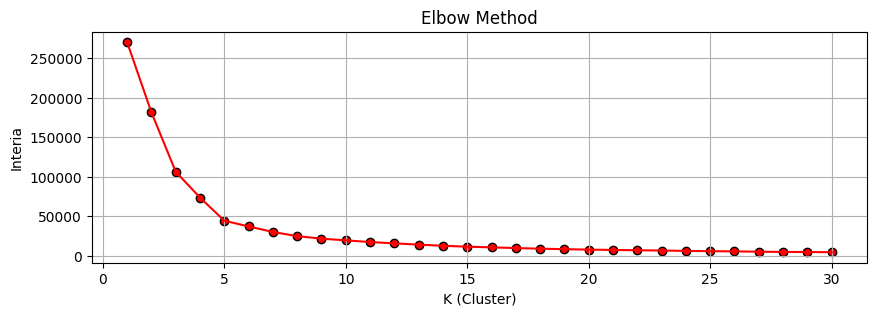

In [58]:
plt.figure(figsize=[10,3])
plt.scatter(range(1,31),wcss,color = 'red',edgecolors = 'black')
plt.plot(range(1,31),wcss,color = 'red')
plt.title("Elbow Method")
plt.xlabel('K (Cluster)')
plt.ylabel("Interia")
plt.grid()
plt.show()

### Final Model

In [59]:
# instance the model
final_km = KMeans(n_clusters=5,init='k-means++',n_init=100,max_iter=300,random_state=1)

# fit the model
final_km.fit(x)

# predcit the value
labels = final_km.predict(x)

In [60]:
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [61]:
df['labels'] = labels

In [62]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [63]:
final_km.inertia_

44448.4554479337

In [64]:
final_km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [65]:
centroid_df = pd.DataFrame(final_km.cluster_centers_,columns = ['x','y'])

In [66]:
centroid_df

,x,y
0,55.296296,49.518519
1,88.200000,17.114286
2,25.727273,79.363636
3,86.538462,82.128205
4,26.304348,20.913043


In [67]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


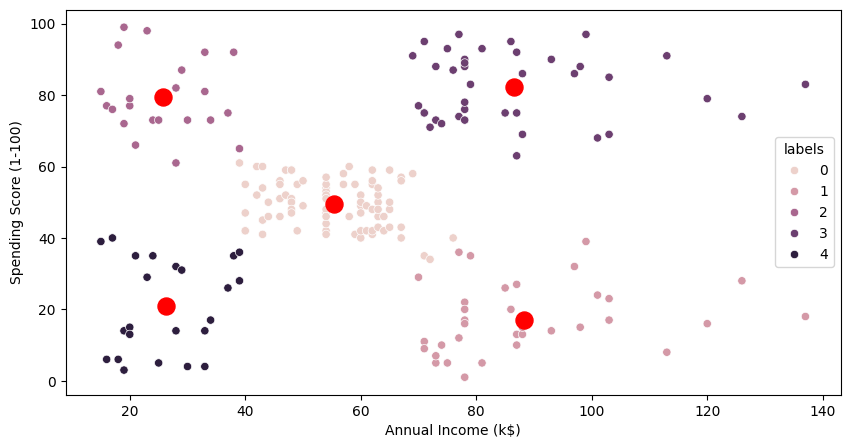

In [74]:
plt.figure(figsize=[10,5])
sns.scatterplot(data = df,x = 'Annual Income (k$)',y='Spending Score (1-100)',hue='labels')
plt.scatter(centroid_df['x'],centroid_df['y'],s = 150,c = 'red')
plt.show()